In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%precision 3
np.random.seed(1111)
%precision 3
%matplotlib inline
# 여러개 한번에 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

'%.3f'

'%.3f'

In [16]:
data = pd.read_csv('./data/ch11_training_rel.csv')
data.shape
data.head()

(20, 2)

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [17]:
data.describe()

,전,후
count,20.000000,20.000000
mean,52.850000,58.250000
std,4.295346,11.964311
min,45.000000,37.000000
25%,50.500000,51.750000
50%,52.000000,58.500000
75%,55.500000,65.750000
max,61.000000,84.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16a4765e0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a476b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a476310>,
 'medians': [<matplotlib.lines.Line2D at 0x16a483160>,
 'fliers': [<matplotlib.lines.Line2D at 0x16a483430>,
 'means': []}

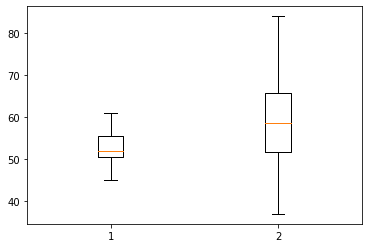

In [18]:
import matplotlib.pyplot as plt

plt.boxplot(data)
plt.show()

In [19]:
# 정규성 검정
stats.shapiro(data.전)
stats.shapiro(data.후)


ShapiroResult(statistic=0.9670043587684631, pvalue=0.6907904148101807)

ShapiroResult(statistic=0.9786623120307922, pvalue=0.9156785011291504)

In [20]:
diff = data.전 - data.후

ShapiroResult(statistic=0.9785393476486206, pvalue=0.9138729572296143)

{'whiskers': [<matplotlib.lines.Line2D at 0x16a4e7e50>,
 'caps': [<matplotlib.lines.Line2D at 0x16a4f6430>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a4e7b80>],
 'medians': [<matplotlib.lines.Line2D at 0x16a4f69d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a4f6ca0>],
 'means': []}

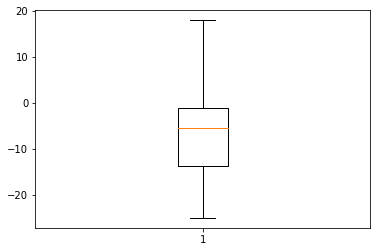

In [21]:
stats.shapiro(diff)
plt.boxplot(diff)

In [22]:
# 대응표본 t 검정 수행
stats.ttest_1samp(data.전-data.후, 0)

Ttest_1sampResult(statistic=-2.204154108716127, pvalue=0.04004419061842953)

In [23]:
data2 = pd.read_csv('./data/ch11_training_ind.csv')
data2.shape
data2.head()

(20, 2)

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [24]:
data2.describe()

,A,B
count,20.000000,20.000000
mean,48.750000,52.050000
std,6.711145,5.020746
min,37.000000,41.000000
25%,44.750000,49.000000
50%,48.500000,52.000000
75%,53.000000,54.250000
max,64.000000,64.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16a54dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x16a55a1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a54d970>,
 'medians': [<matplotlib.lines.Line2D at 0x16a55a700>,
 'fliers': [<matplotlib.lines.Line2D at 0x16a55a9d0>,
 'means': []}

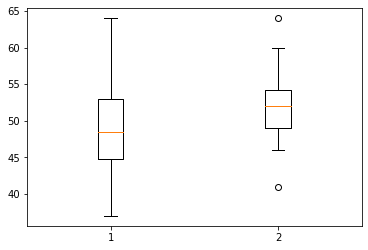

In [25]:
plt.boxplot(data2)
plt.show()

In [26]:
stats.shapiro(data2.A)
stats.shapiro(data2.B)

ShapiroResult(statistic=0.9685941338539124, pvalue=0.7249506711959839)

ShapiroResult(statistic=0.9730018973350525, pvalue=0.8165740370750427)

In [27]:
# 등분산성 검정
stats.levene(data2.A, data2.B)

LeveneResult(statistic=2.061573118077718, pvalue=0.15923550057222613)

In [28]:
# 독립표본 t 검정
stats.ttest_ind(data2.A, data2.B, equal_var=True)

Ttest_indResult(statistic=-1.7608157246524712, pvalue=0.08631600572195147)

In [29]:
# 카이제곱 검정
data = pd.read_csv('./data/ch11_ad.csv')
data.shape
data.head()

(1000, 2)

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [31]:
cross = pd.crosstab(data.광고, data.구입)
cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [32]:
stats.chi2_contingency(cross, correction=False)

(3.75,
 0.052807511416113395,
 1,
 array([[360.,  40.],
        [540.,  60.]]))